Signature Detection Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Access data from drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
train_data_org='/content/drive/MyDrive/sign_data/train'
test_data_org='/content/drive/MyDrive/sign_data/test'

AxesImage(54,36;334.8x217.44)


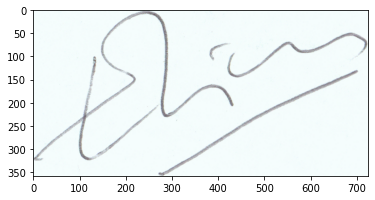

In [ ]:
img_1=plt.imread('/content/drive/MyDrive/sign_data/train/001/001_01.PNG')
print(plt.imshow(img_1))

AxesImage(54,36;334.8x217.44)


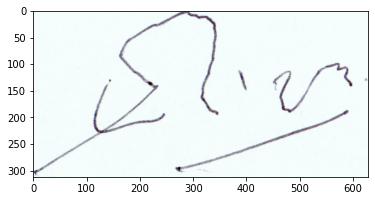

In [ ]:
img_2=plt.imread('/content/drive/MyDrive/sign_data/train/001_forg/0119001_01.png')
print(plt.imshow(img_2))

In [ ]:
import cv2
from glob import glob
import os

In [ ]:
a=os.listdir('/content/drive/MyDrive/sign_data/sign_data/train')
print(a)

['001', '001_forg', '002', '002_forg', '003', '003_forg', '004', '004_forg', '006', '006_forg', '009', '009_forg', '012', '012_forg', '013', '013_forg', '014', '014_forg', '015', '015_forg', '016', '016_forg', '017', '017_forg', '018', '018_forg', '019', '019_forg', '020', '020_forg', '021', '021_forg', '022', '022_forg', '023', '023_forg', '024', '024_forg', '025', '025_forg', '026', '026_forg', '027', '027_forg', '028', '028_forg', '029', '029_forg', '030', '030_forg', '031', '031_forg', '032', '032_forg', '033', '033_forg', '034', '034_forg', '035', '035_forg', '036', '036_forg', '037', '037_forg', '038', '038_forg', '039', '039_forg', '040', '040_forg', '041', '041_forg', '042', '042_forg', '043', '043_forg', '044', '044_forg', '045', '045_forg', '046', '046_forg', '047', '047_forg', '048', '048_forg', '049', '049_forg', '050', '050_forg', '051', '051_forg', '052', '052_forg', '053', '053_forg', '054', '054_forg', '055', '055_forg', '056', '056_forg', '057', '057_forg', '058', '058

In [ ]:
print(glob('/content/drive/MyDrive/sign_data/train/001/*'))


['/content/drive/MyDrive/sign_data/train/001/001_01.PNG', '/content/drive/MyDrive/sign_data/train/001/001_02.PNG', '/content/drive/MyDrive/sign_data/train/001/001_03.PNG', '/content/drive/MyDrive/sign_data/train/001/001_04.PNG', '/content/drive/MyDrive/sign_data/train/001/001_05.PNG', '/content/drive/MyDrive/sign_data/train/001/001_06.PNG', '/content/drive/MyDrive/sign_data/train/001/001_07.PNG', '/content/drive/MyDrive/sign_data/train/001/001_08.PNG', '/content/drive/MyDrive/sign_data/train/001/001_09.PNG', '/content/drive/MyDrive/sign_data/train/001/001_10.PNG', '/content/drive/MyDrive/sign_data/train/001/001_11.PNG', '/content/drive/MyDrive/sign_data/train/001/001_12.PNG', '/content/drive/MyDrive/sign_data/train/001/001_13.PNG', '/content/drive/MyDrive/sign_data/train/001/001_14.PNG', '/content/drive/MyDrive/sign_data/train/001/001_15.PNG', '/content/drive/MyDrive/sign_data/train/001/001_16.PNG', '/content/drive/MyDrive/sign_data/train/001/001_17.PNG', '/content/drive/MyDrive/sign_d

In [ ]:
train_data=[]
train_labels=[]

In [ ]:
for i in os.listdir('/content/drive/MyDrive/sign_data/sign_data/train'): #reading images and scaling
  for j in glob('/content/drive/MyDrive/sign_data/train/'+i+'/*' ):
    image=cv2.imread(j)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(224,224))
    train_data.append([image])
    if i[-1]=='g':
      train_labels.append(np.array(1))
    else:
        train_labels.append(np.array(0))

    

In [ ]:
train_data=np.array(train_data)/255.0 
train_labels=np.array(train_labels)

In [ ]:
train_data.shape,train_labels.shape

((1649, 1, 224, 224, 3), (1649,))

In [ ]:
test_data=[]
test_labels=[]

In [ ]:
for i in os.listdir('/content/drive/MyDrive/sign_data/test'):# reading images and scaling
  for j in glob('/content/drive/MyDrive/sign_data/test/'+i+'/*' ):
    image=cv2.imread(j)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(224,224))
    test_data.append([image])
    if i[-1]=='g':
      test_labels.append(np.array(1))
    else:
      test_labels.append(np.array(0))

In [ ]:
test_data=np.array(test_data)/255.0 #rescaling test images
test_labels=np.array(test_labels)

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((1649, 1, 224, 224, 3), (1649,), (500, 1, 224, 224, 3), (500,))

In [ ]:
print((test_labels).dtype)
print(train_labels.dtype)

int64
int64


In [ ]:
import tensorflow as tf
! pip install keras.utils

Processing /root/.cache/pip/wheels/46/25/27/7707005c1cb27e1ffc8277b004ac295e34767b02b44d73d6be/keras_utils-1.0.13-cp37-none-any.whl


In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [ ]:
train_data.shape

(1649, 1, 224, 224, 3)

In [ ]:
train_labels.shape

(1649, 2)

In [ ]:
train_data = train_data.reshape(-1, 224,224, 3)
test_data = test_data.reshape(-1, 224,224, 3)

AxesImage(54,36;334.8x217.44)


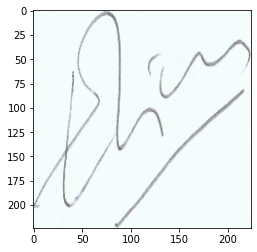

In [ ]:
print(plt.imshow(train_data[0]))

In [ ]:
train_data.shape, test_data.shape

((1649, 224, 224, 3), (500, 224, 224, 3))

In [ ]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)
test_data,test_labels = shuffle(test_data,test_labels)

In [ ]:
train_data.shape, test_data.shape,train_labels.shape,test_labels.shape

((1649, 224, 224, 3), (500, 224, 224, 3), (1649, 2), (500, 2))

In [ ]:
from tensorflow .keras.layers import Input, Lambda, Dense, Flatten # Importing required library
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

Image_size=[224,224]

In [ ]:
inception=InceptionV3(input_shape=Image_size + [3], weights='imagenet', include_top=False)# Transfer learning

In [ ]:

for layer in inception.layers:
  layer.trainable=False

In [ ]:
x=Flatten()(inception.output)
prediction=Dense(265, activation='relu')(x)
predictions=Dense(2,activation='softmax')(prediction)
model=Model(inputs=inception.input, outputs=predictions)


In [ ]:
model.summary() # summary of model

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [ ]:

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:

Epoch = 12
Batch = 32
progress = model.fit(train_data,train_labels, batch_size=Batch,epochs=Epoch,validation_split=0.3)

Epoch 1/12
37/37 [==============================] - 9s 145ms/step - loss: 3.3940 - accuracy: 0.7184 - val_loss: 0.6334 - val_accuracy: 0.8525
Epoch 2/12
37/37 [==============================] - 4s 108ms/step - loss: 0.2692 - accuracy: 0.9047 - val_loss: 1.1897 - val_accuracy: 0.7717
Epoch 3/12
37/37 [==============================] - 4s 109ms/step - loss: 0.5373 - accuracy: 0.8744 - val_loss: 0.7847 - val_accuracy: 0.8465
Epoch 4/12
37/37 [==============================] - 4s 109ms/step - loss: 0.1061 - accuracy: 0.9619 - val_loss: 0.4889 - val_accuracy: 0.8707
Epoch 5/12
37/37 [==============================] - 4s 110ms/step - loss: 0.0169 - accuracy: 0.9957 - val_loss: 0.5151 - val_accuracy: 0.8747
Epoch 6/12
37/37 [==============================] - 4s 113ms/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.4702 - val_accuracy: 0.8707
Epoch 7/12
37/37 [==============================] - 4s 110ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4696 - val_accuracy: 0.8646
Epoch 

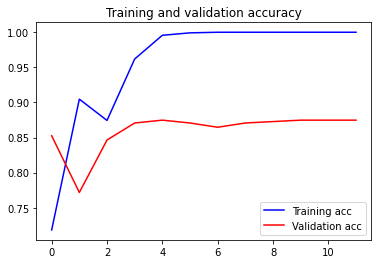

In [ ]:
acc = progress.history['accuracy']
val_acc = progress.history['val_accuracy']
loss = progress.history['loss']
val_loss = progress.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.show()

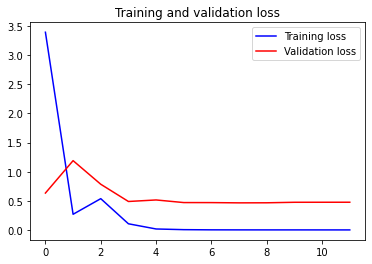

In [ ]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.models import load_model

model.save('facefeatures_new_model.h5')

In [ ]:
pred = model.predict(test_data)
pred

array([[8.24211001e-01, 1.75788999e-01],
       [9.56314494e-09, 1.00000000e+00],
       [1.80608174e-06, 9.99998212e-01],
       [4.83391760e-03, 9.95166063e-01],
       [6.92137121e-08, 9.99999881e-01],
       [1.00000000e+00, 3.68165554e-10],
       [9.99184787e-01, 8.15186941e-04],
       [9.99918222e-01, 8.18215849e-05],
       [6.21259323e-06, 9.99993801e-01],
       [1.19583274e-03, 9.98804212e-01],
       [9.99983430e-01, 1.65255915e-05],
       [1.00000000e+00, 3.95254879e-12],
       [9.99994755e-01, 5.19978903e-06],
       [9.99992728e-01, 7.21230253e-06],
       [6.34153008e-01, 3.65847021e-01],
       [9.99118149e-01, 8.81799380e-04],
       [9.99361575e-01, 6.38391182e-04],
       [1.00000000e+00, 5.74261342e-13],
       [1.27022926e-04, 9.99872923e-01],
       [9.99997735e-01, 2.23285770e-06],
       [4.59510545e-08, 1.00000000e+00],
       [7.61355139e-08, 9.99999881e-01],
       [9.99995708e-01, 4.34101185e-06],
       [1.43011297e-12, 1.00000000e+00],
       [1.000000

In [ ]:
pred=np.argmax(pred, axis=1)

In [ ]:
test_lbel=np.argmax(test_labels, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(test_lbel,pred)) # accuracy score

0.96


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(test_lbel,pred)) # confusion matrix

[[240  12]
 [  8 240]]
